In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df=pd.read_csv(r"C:\Users\DIWAKAR YADAV\Downloads\after_EDA_dataset.csv")

In [3]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             901 non-null    object 
 1   price             901 non-null    int64  
 2   reting            901 non-null    float64
 3   is_5g             901 non-null    int64  
 4   is_nfc            901 non-null    float64
 5   is_ir_blaster     901 non-null    int64  
 6   processor_brand   901 non-null    object 
 7   core              901 non-null    int64  
 8   proccessor_speed  901 non-null    float64
 9   ram               901 non-null    float64
 10  internal_memory   901 non-null    int64  
 11  battery_size      901 non-null    int64  
 12  fast_charge       901 non-null    int64  
 13  charging_speed    901 non-null    int64  
 14  rear_mp           901 non-null    int64  
 15  front_mp          901 non-null    int64  
 16  os                901 non-null    object 
 1

In [5]:
df.columns

Index(['brand', 'price', 'reting', 'is_5g', 'is_nfc', 'is_ir_blaster',
       'processor_brand', 'core', 'proccessor_speed', 'ram', 'internal_memory',
       'battery_size', 'fast_charge', 'charging_speed', 'rear_mp', 'front_mp',
       'os', 'display_size', 'refresh_rate'],
      dtype='object')

In [6]:
df.rename(columns={'reting': 'rating'}, inplace=True)

In [7]:
df.columns

Index(['brand', 'price', 'rating', 'is_5g', 'is_nfc', 'is_ir_blaster',
       'processor_brand', 'core', 'proccessor_speed', 'ram', 'internal_memory',
       'battery_size', 'fast_charge', 'charging_speed', 'rear_mp', 'front_mp',
       'os', 'display_size', 'refresh_rate'],
      dtype='object')

In [8]:
df.isnull().sum()

brand               0
price               0
rating              0
is_5g               0
is_nfc              0
is_ir_blaster       0
processor_brand     0
core                0
proccessor_speed    0
ram                 0
internal_memory     0
battery_size        0
fast_charge         0
charging_speed      0
rear_mp             0
front_mp            0
os                  0
display_size        0
refresh_rate        0
dtype: int64

In [9]:
# all categoricol columns in df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['brand', 'processor_brand', 'os'], dtype='object')


In [10]:
# all numerical col
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['price', 'rating', 'is_5g', 'is_nfc', 'is_ir_blaster', 'core',
       'proccessor_speed', 'ram', 'internal_memory', 'battery_size',
       'fast_charge', 'charging_speed', 'rear_mp', 'front_mp', 'display_size',
       'refresh_rate'],
      dtype='object')


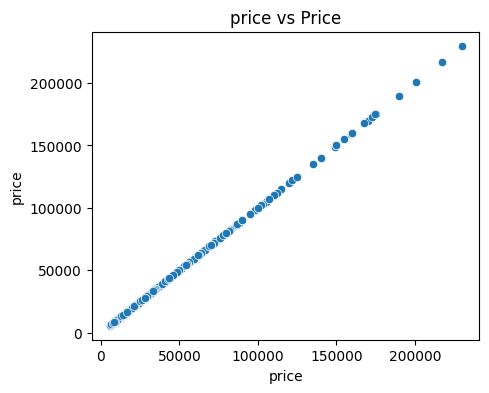

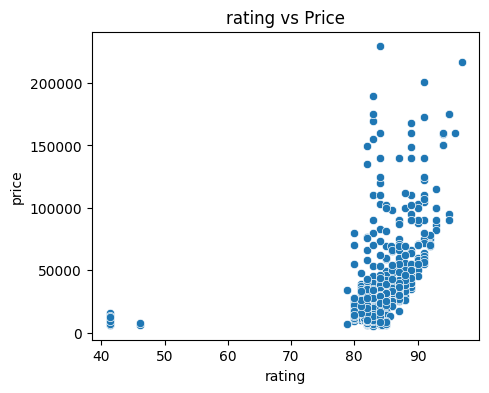

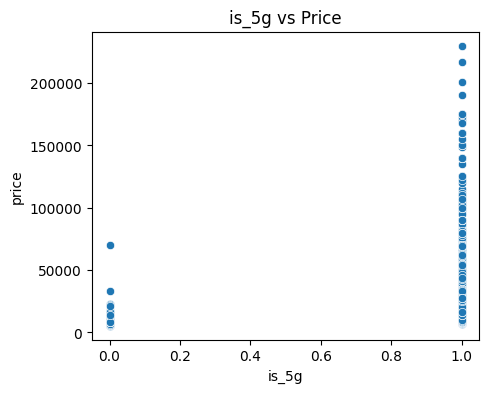

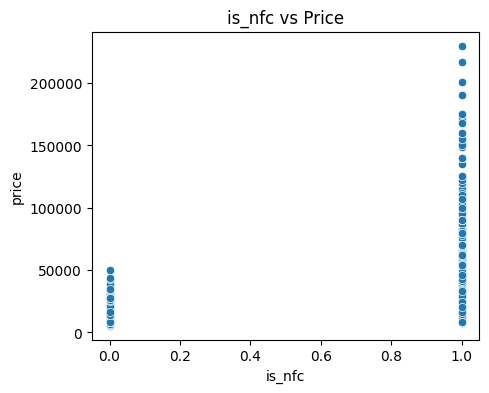

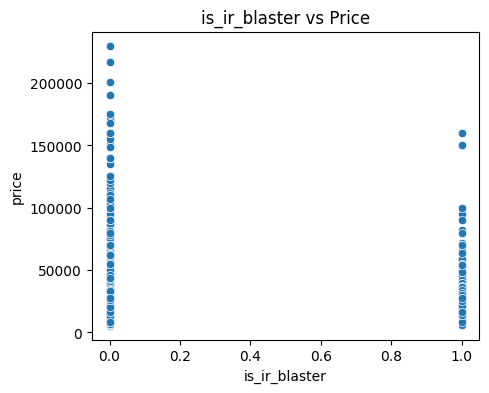

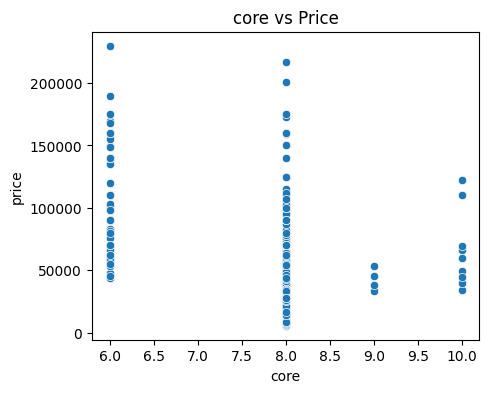

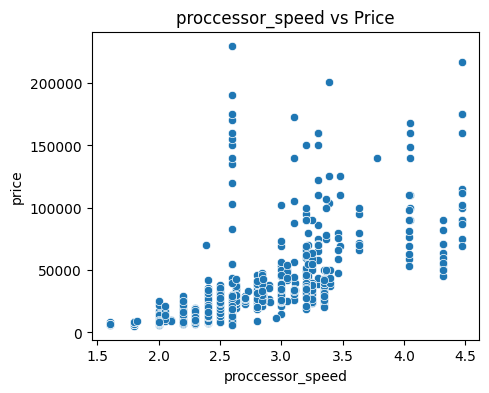

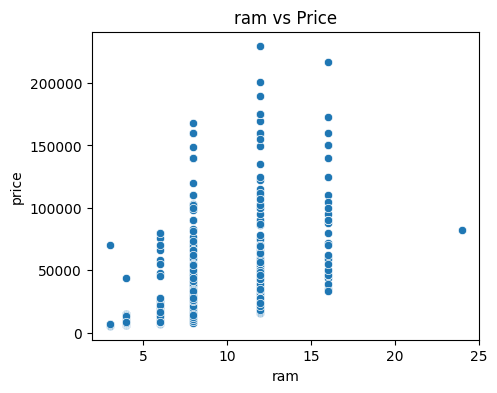

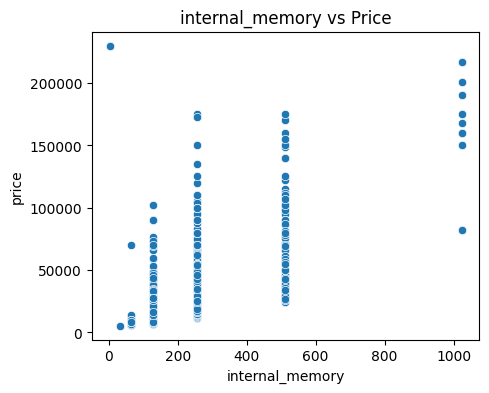

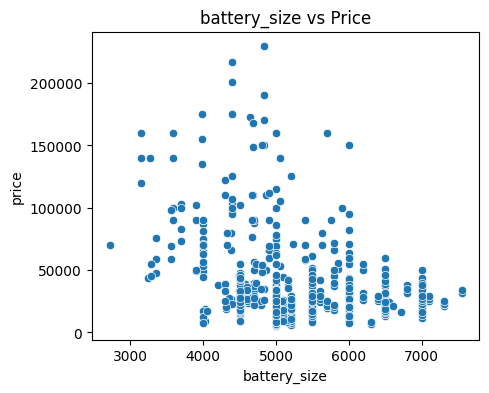

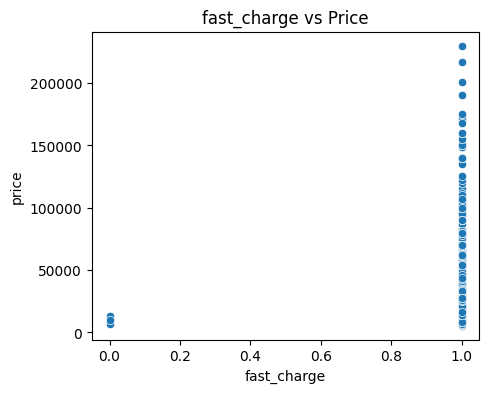

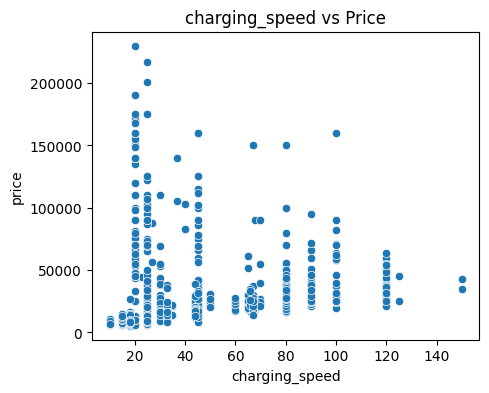

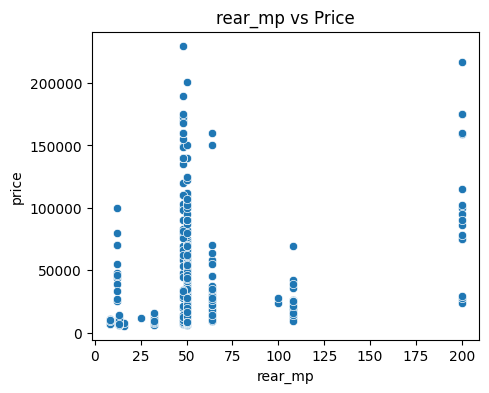

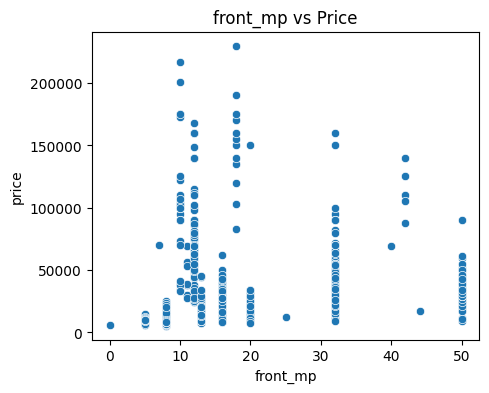

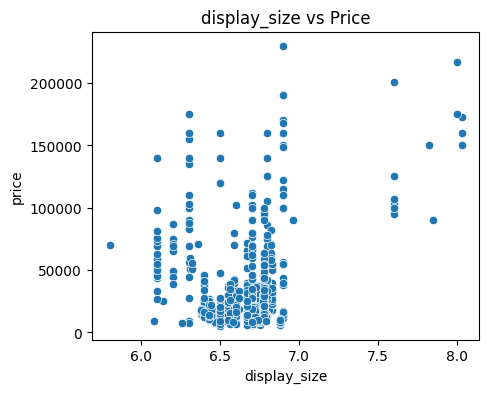

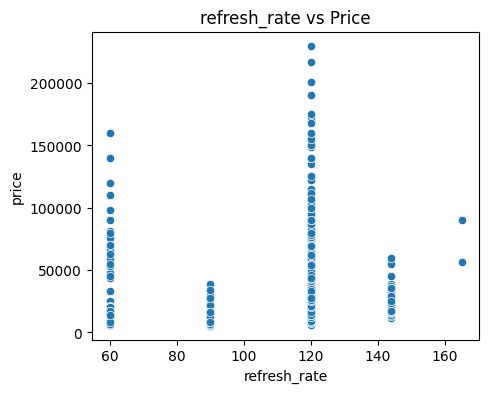

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# scatter plot for numericol col
for col in numerical_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
    plt.show()

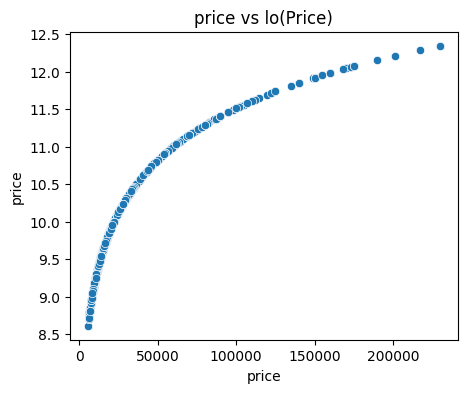

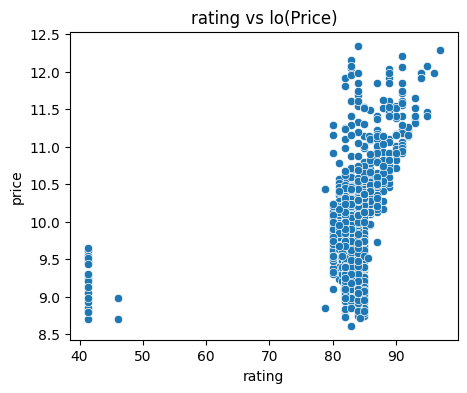

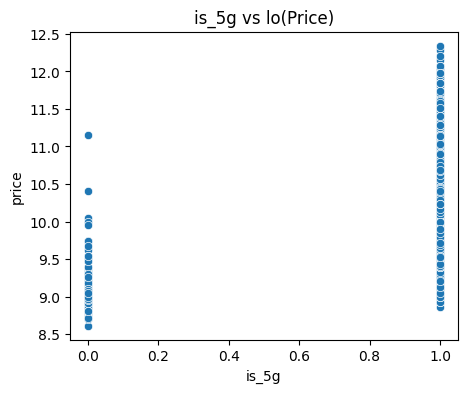

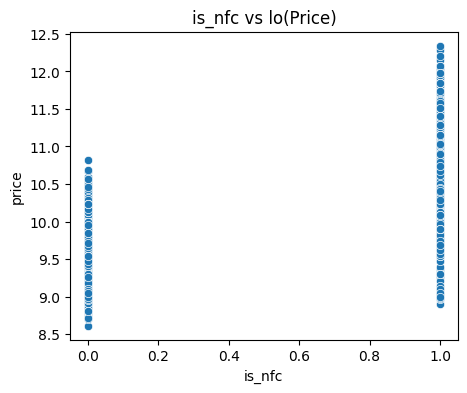

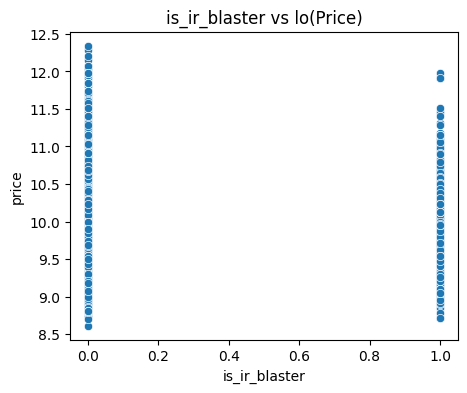

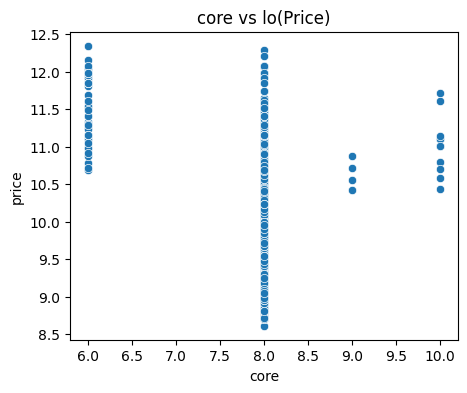

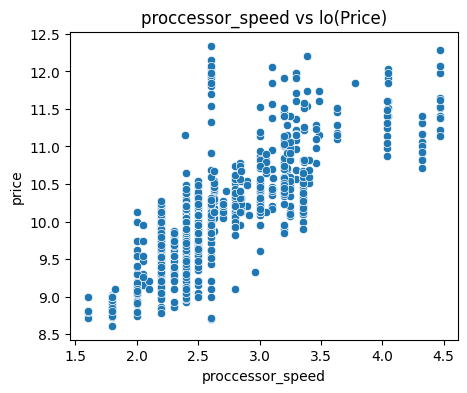

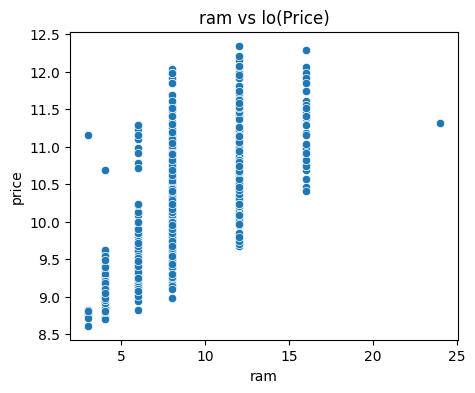

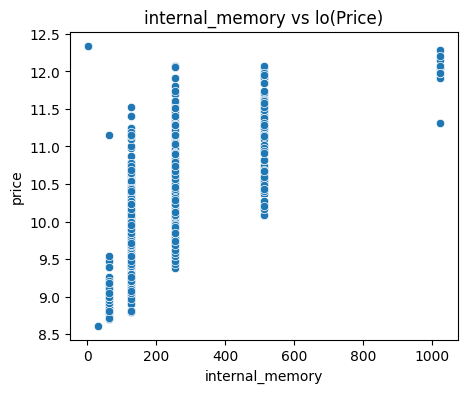

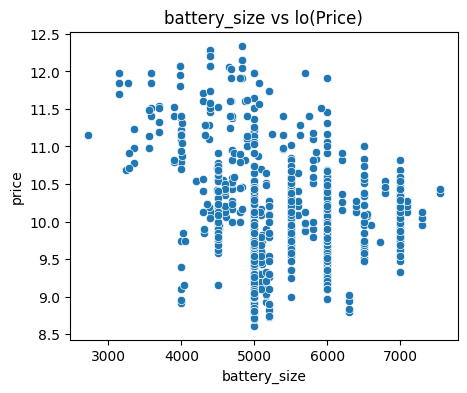

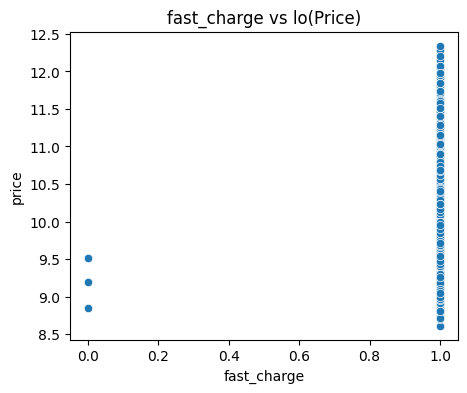

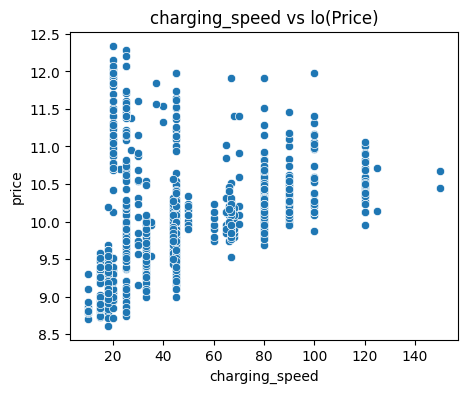

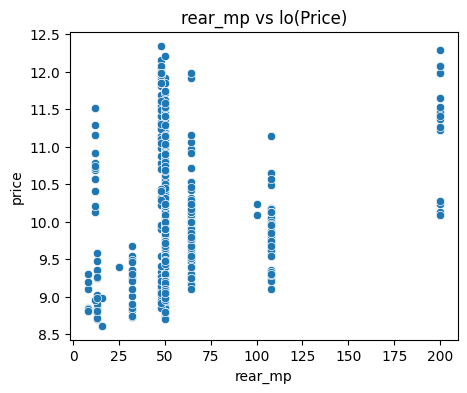

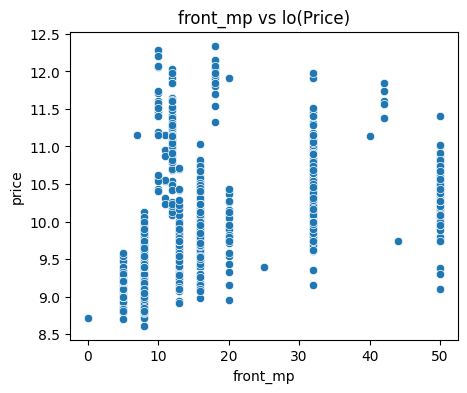

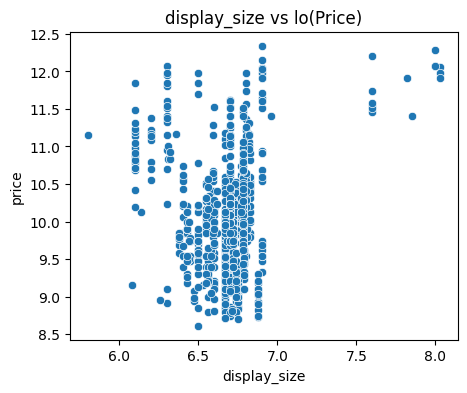

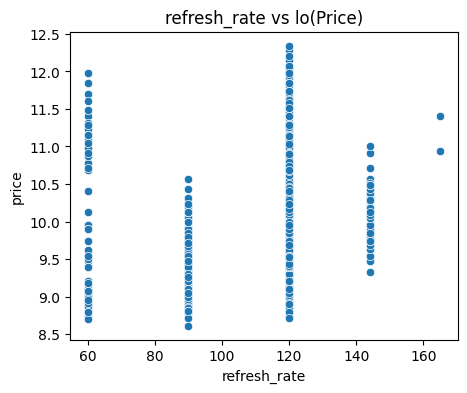

In [12]:
import seaborn as sns
# scatter plot for numericol col
for col in numerical_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=np.log1p(df['price']))
    plt.title(f'{col} vs lo(Price)')
    plt.show()

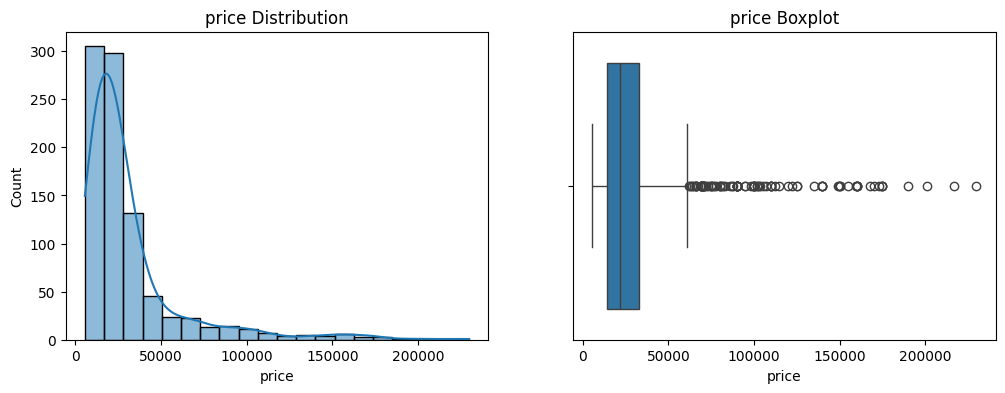

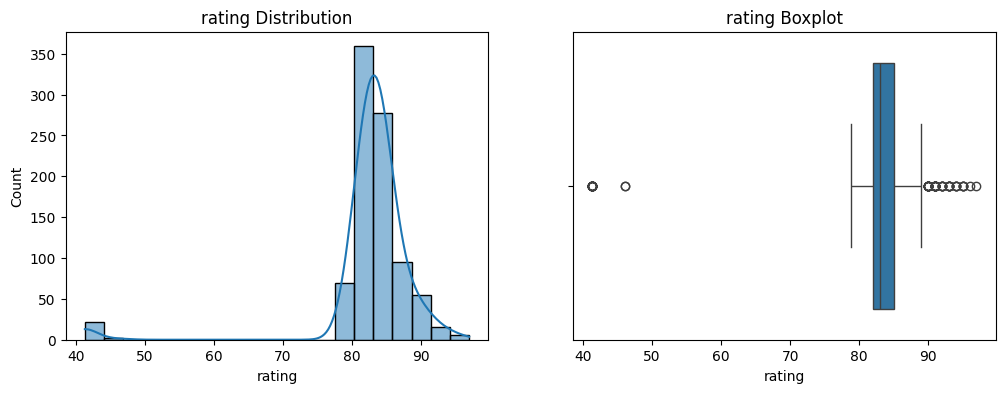

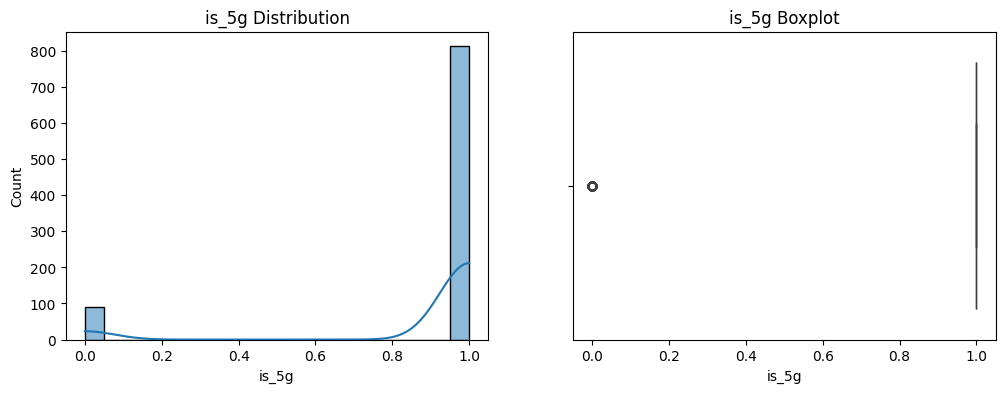

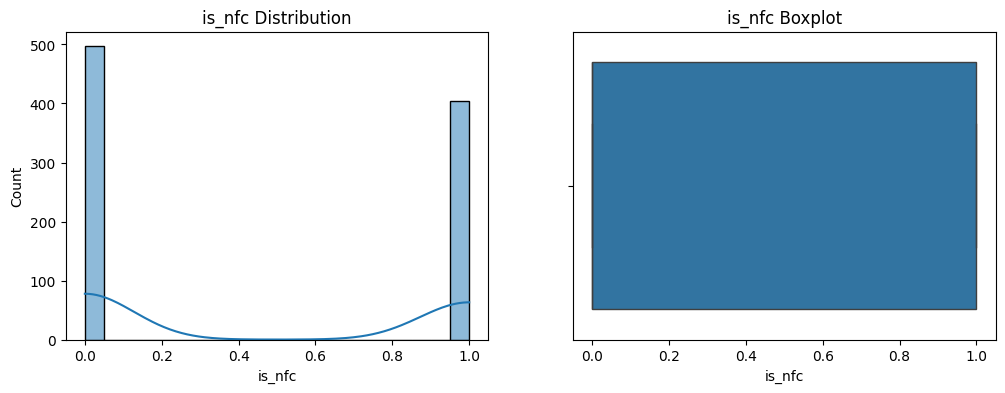

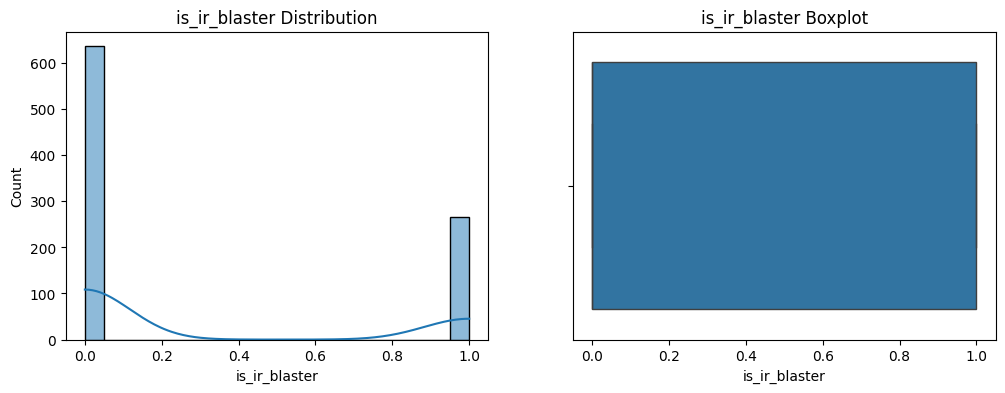

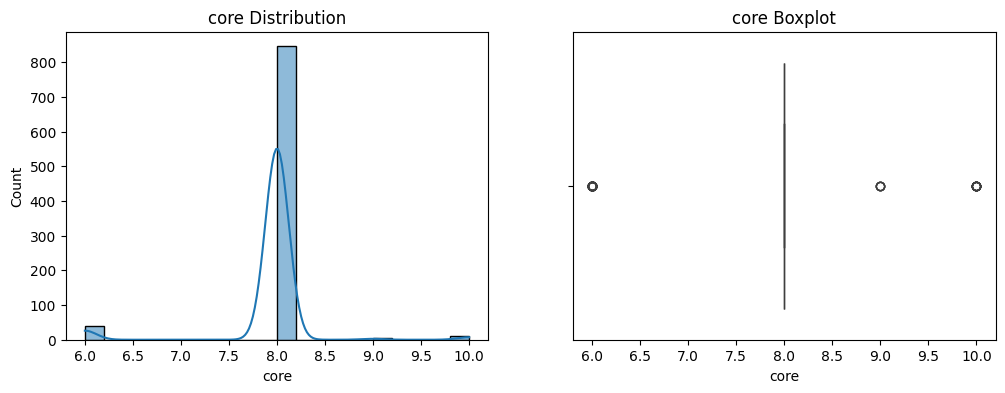

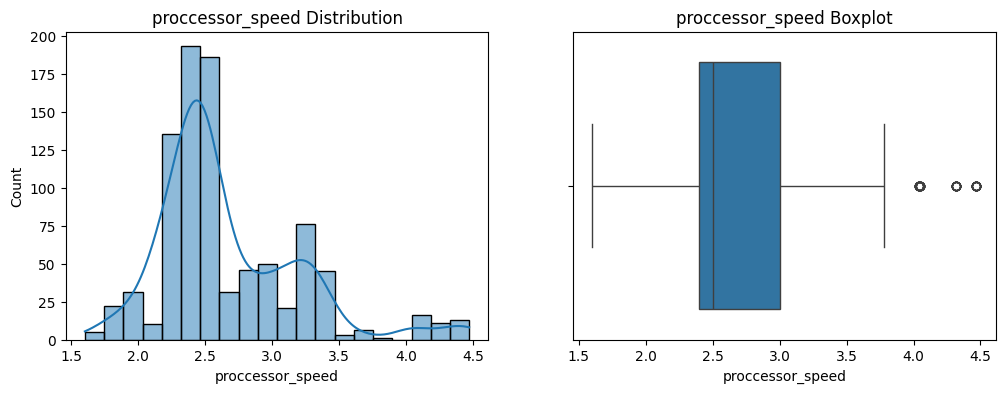

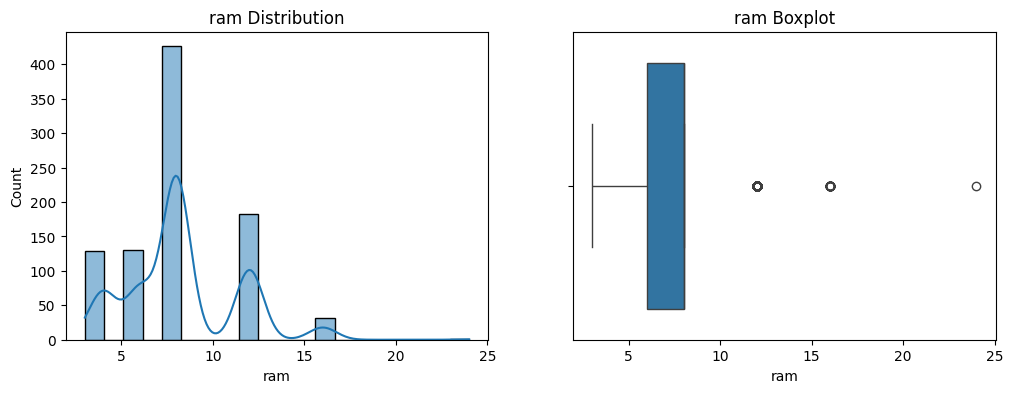

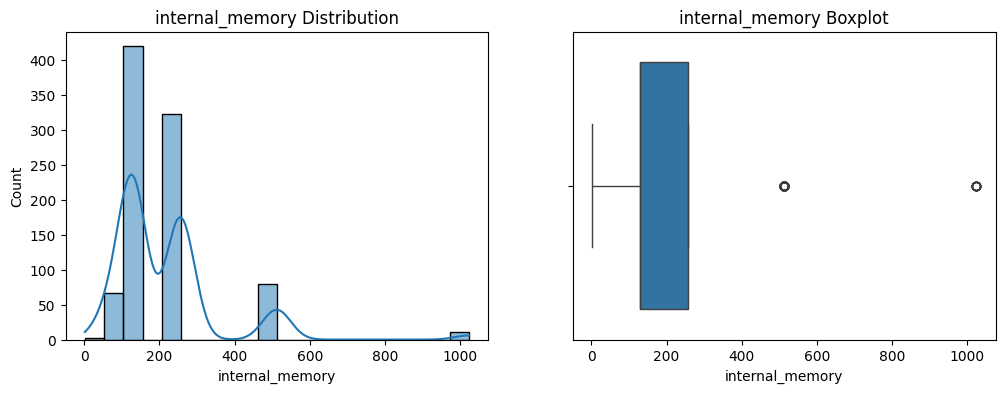

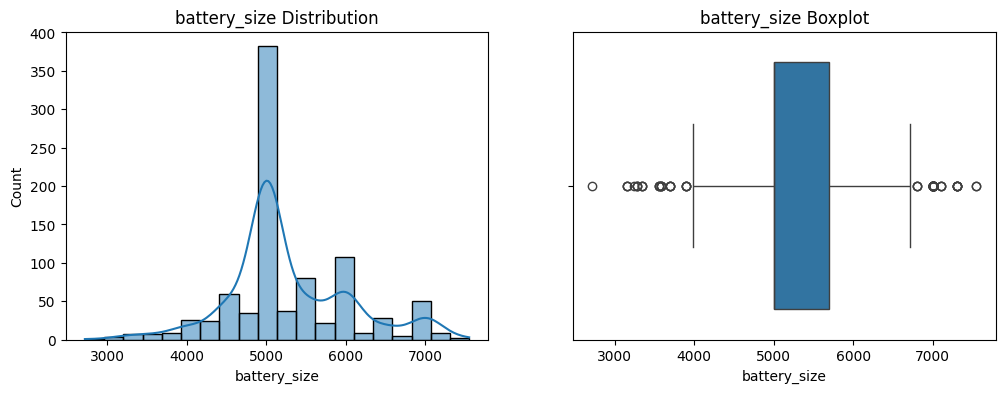

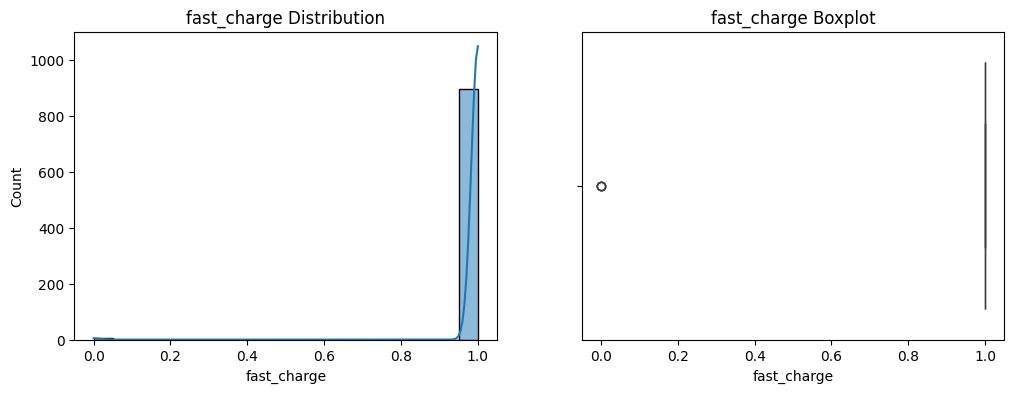

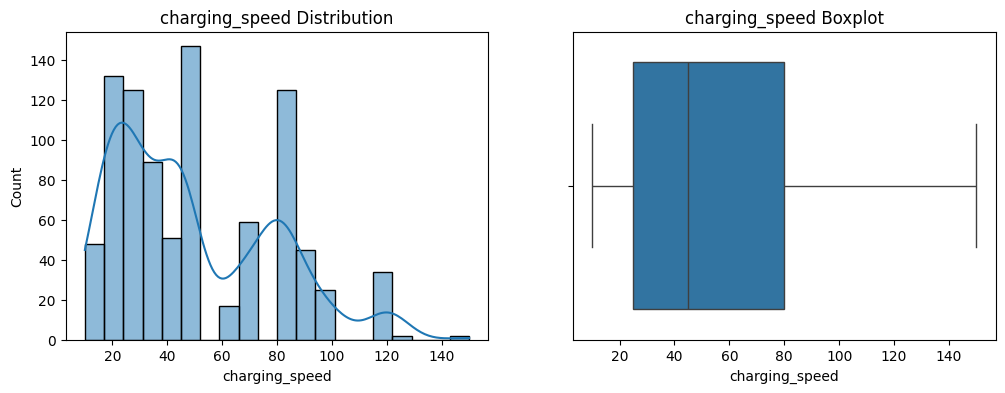

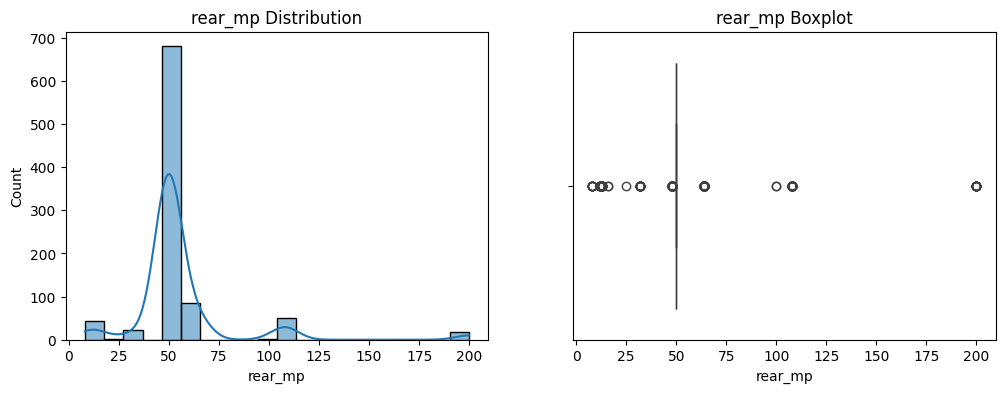

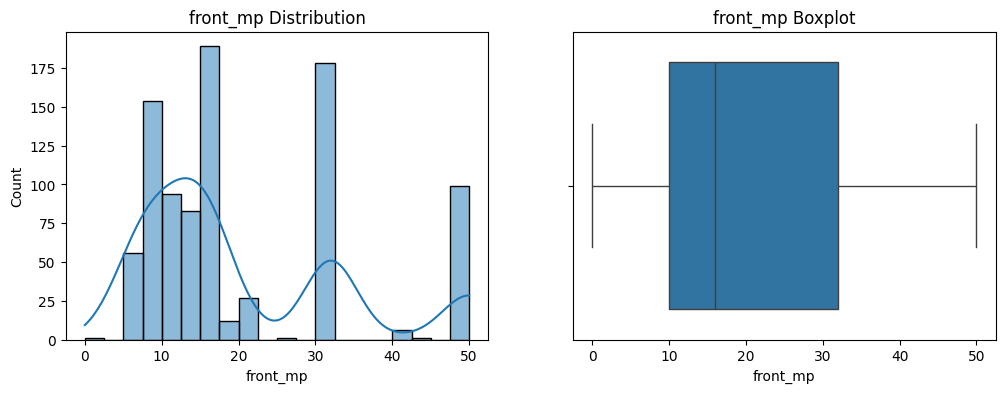

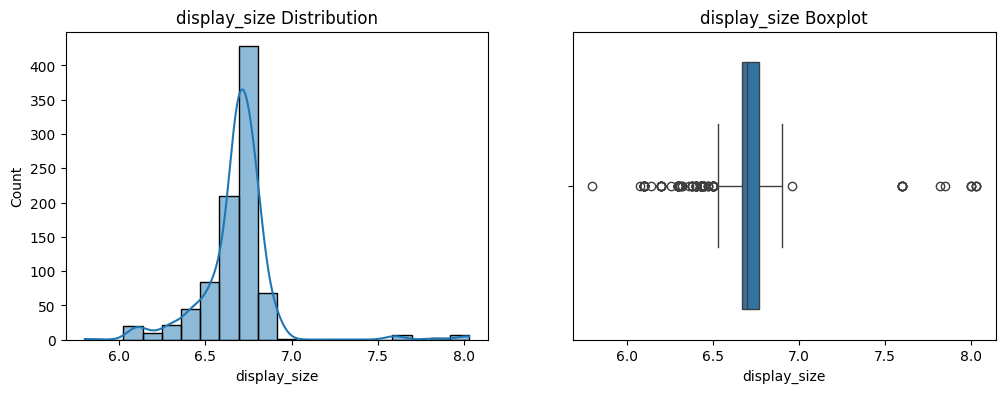

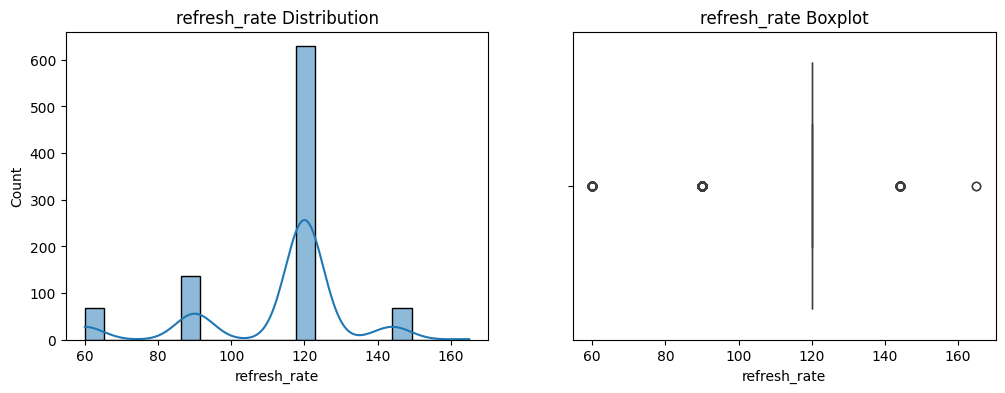

In [13]:
# numerical col
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    
    plt.show()


In [14]:
# correlation of numerical col
num_corr = (
    df[numerical_cols]
    .corr()
    ['price']
    .sort_values(ascending=False)
)

print(num_corr)


price               1.000000
internal_memory     0.678439
proccessor_speed    0.658290
ram                 0.535673
is_nfc              0.482734
rating              0.326060
display_size        0.239964
rear_mp             0.222221
is_5g               0.220074
front_mp            0.115250
refresh_rate        0.089812
charging_speed      0.064075
fast_charge         0.043297
is_ir_blaster      -0.045774
battery_size       -0.272072
core               -0.390338
Name: price, dtype: float64


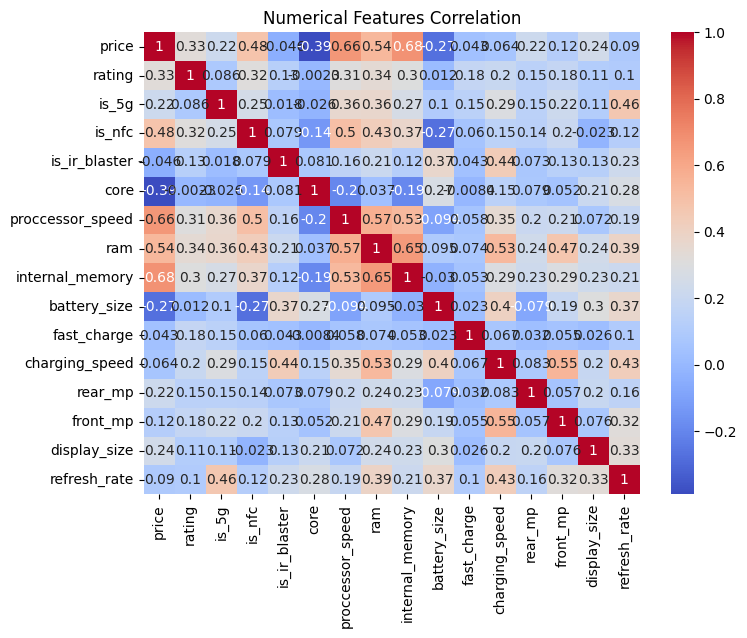

In [15]:
# numerical column corrrelation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Numerical Features Correlation")
plt.show()

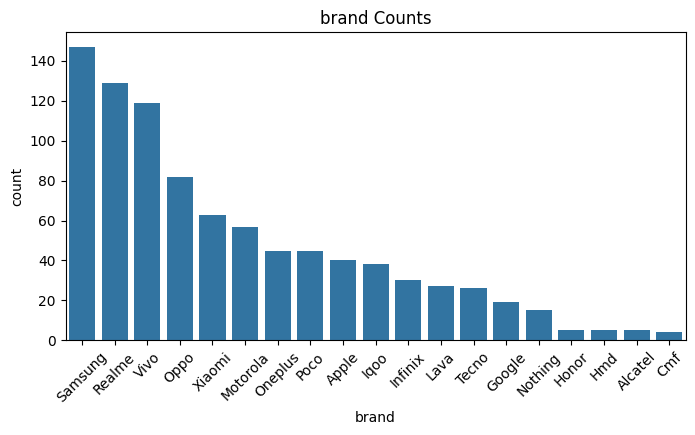

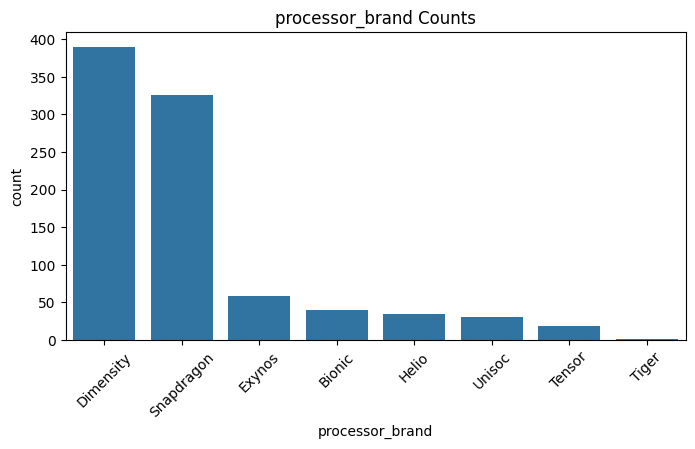

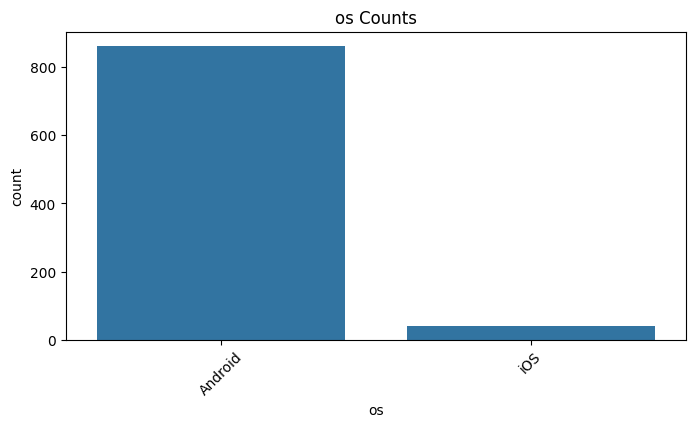

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Counts')
    plt.xticks(rotation=45)
    plt.show()


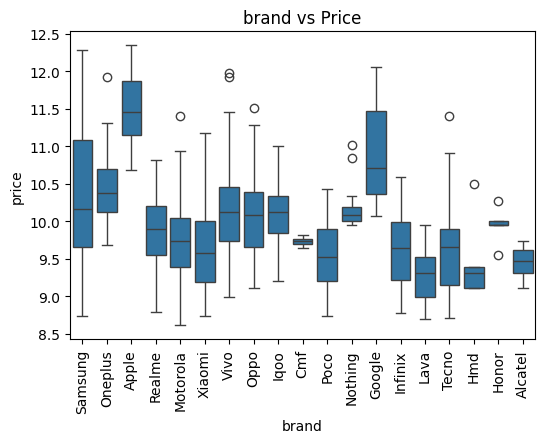

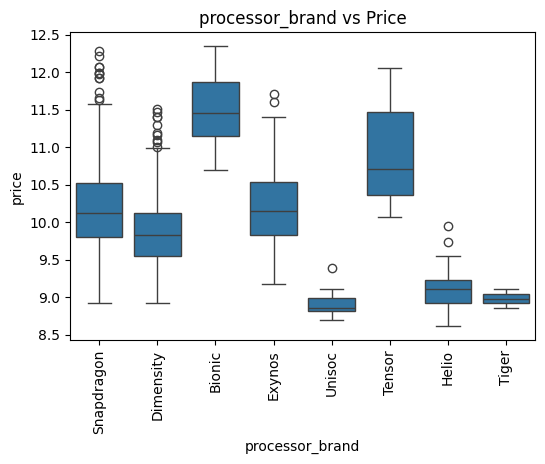

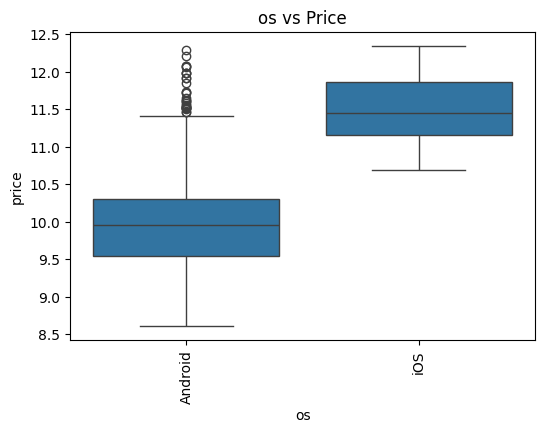

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=np.log1p(df['price']))
    plt.title(f'{col} vs Price')
    plt.xticks(rotation=90)
    plt.show()


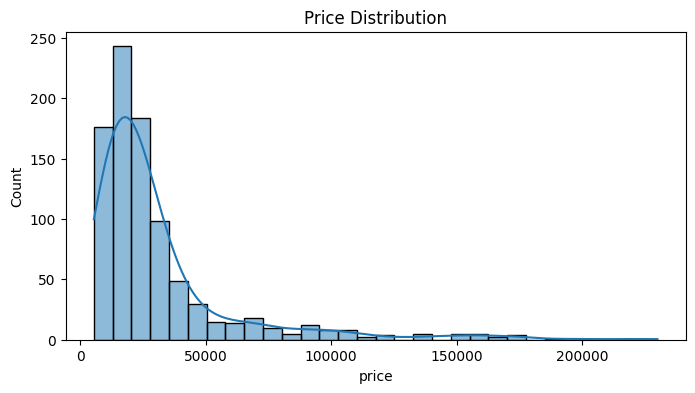

In [18]:
# target col distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()


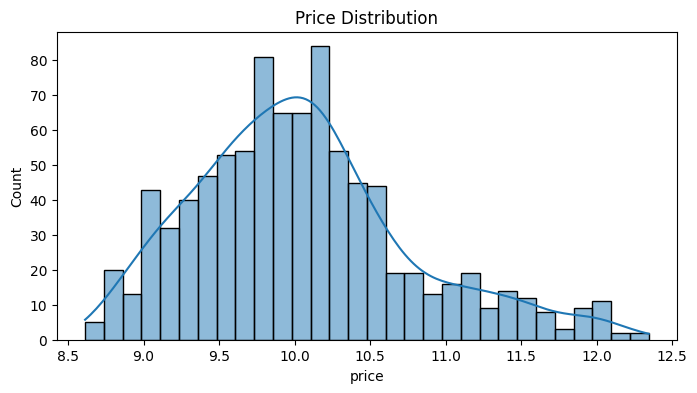

In [19]:
# target col distribution with log normal transform
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['price']), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

Text(0.5, 1.0, 'log_price Boxplot')

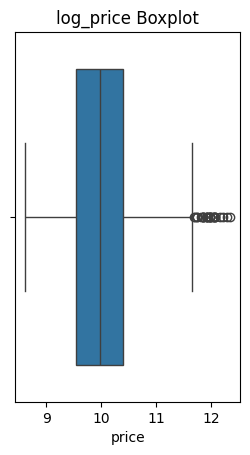

In [20]:
# box plot of price after log normal
col='log_price'
plt.subplot(1,2,2)
sns.boxplot(x=np.log1p(df['price']))
plt.title(f'{col} Boxplot')

In [21]:
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)


In [22]:
df_encoded.shape

(901, 42)

In [23]:
df_encoded.head()

,price,rating,is_5g,is_nfc,is_ir_blaster,core,proccessor_speed,ram,internal_memory,battery_size,...,brand_Vivo,brand_Xiaomi,processor_brand_Dimensity,processor_brand_Exynos,processor_brand_Helio,processor_brand_Snapdragon,processor_brand_Tensor,processor_brand_Tiger,processor_brand_Unisoc,os_iOS
0,74999,92.0,1,1.0,0,8,3.30,12.0,256,5000,...,False,False,False,False,False,True,False,False,False,False
1,24997,83.0,1,0.0,1,8,3.35,8.0,128,7100,...,False,False,True,False,False,False,False,False,False,False
2,47999,81.0,1,1.0,0,6,3.46,6.0,128,3349,...,False,False,False,False,False,False,False,False,False,True
3,16999,82.0,1,0.0,0,8,2.40,6.0,128,7000,...,False,False,True,False,False,False,False,False,False,False
4,33890,84.0,1,1.0,0,10,3.11,8.0,128,4700,...,False,False,False,True,False,False,False,False,False,False


In [24]:
# without log transform

In [25]:
X = df_encoded.drop(columns='price')   # input feature
y = np.log1p(df_encoded['price'])  # target columns

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np

class GDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.cost_history = []  # track cost per epoch

    def compute_cost(self, X_train, y_train):
        m = len(y)
        y_hat = np.dot(X_train, self.coef_) + self.intercept_
        cost = (1/(2*m)) * np.sum((y_train - y_hat)**2)
        return cost

    def fit(self, X_train, y_train):
        # initialize coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        self.cost_history = []

        for i in range(self.epochs):
            # predictions
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            # compute derivatives
            intercept_der = -2 * np.mean(y_train - y_hat)
            coef_der = -2 * np.dot((y_train - y_hat), X_train) / X_train.shape[0]

            # update parameters
            self.intercept_ -= self.lr * intercept_der
            self.coef_ -= self.lr * coef_der

            # compute and save cost
            cost = self.compute_cost(X_train, y_train)
            self.cost_history.append(cost)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

    def get_coef(self):
        return self.coef_

    def get_intercept(self):
        return self.intercept_


In [ ]:
gd=GDRegressor(epochs=2000,learning_rate=0.1)

In [ ]:
gd.fit(X_train_scaled,y_train)

In [ ]:
gd.get_coef()

In [ ]:
gd.get_intercept()

In [ ]:
y_pred1=gd.predict(X_test_scaled)

In [ ]:
r2_score(y_test,y_pred1)


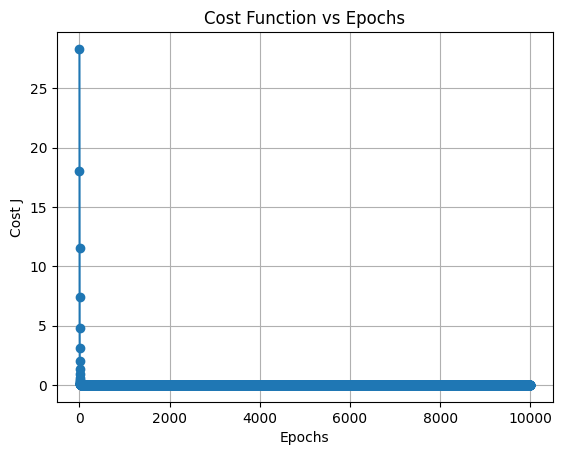

In [209]:
# Initialize the gradient descent model
model = GDRegressor(epochs=10000,learning_rate=0.1)

# Fit the model on your scaled data
model.fit(X_train_scaled, y_train)

# Visualize cost vs epochs
import matplotlib.pyplot as plt

plt.plot(range(1, len(model.cost_history)+1), model.cost_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost J')
plt.title('Cost Function vs Epochs')
plt.grid(True)
plt.show()
